In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Zagadnienie optymalizacji

Rozważmy problem optymalizacyjny 
\begin{equation} \label{opte1eq1} \left\{ \begin{array}{l} f(x)\rightarrow min\\ x\in W&& \end{array} \right. \end{equation} gdzie $W\subset \mathbb{R}^n$, $f:W\rightarrow \mathbb{R}$


\begin{definition}[Stożek kierunków stycznych] Stożkiem kierunków stycznych w punkcie $\overline{x}\in W$ nazywamy zbiór wektorów \begin{equation} \label{opteq2} 
T(\overline{x})=\left\{ d\in \mathbb{R^n}:\ d=\lambda_k(x_k-\overline{x}),\ (x_k)\subset W,\ x_k\rightarrow \overline{x}\right\} \end{equation}
\end{definition}

Poniższy rysunek pokazuje przykładowe wektory dla dwóch punktów $\overline{x}$. Punkt czarny należy do wnętrza $W$ zatem jego stożek kierunków stycznych jest równy $\mathbb{R^2}$ - na rysunku pokazano dwa przykładowe ciągi zbieżne do   $\overline{x}$.
W przypadku różowego  $\overline{x}\in \partial{W}$ stożek jest ograniczony - graniczne kierunki wyznacza w tym przypadku prosta styczna (punkt  $\overline{x}$ jest punktem gładkości brzegu $W$). Wektor jasnoniebieski nie należy już do stożka w tym punkcie, w odróżnieniu od wektora zielonego i pomarańczowego.

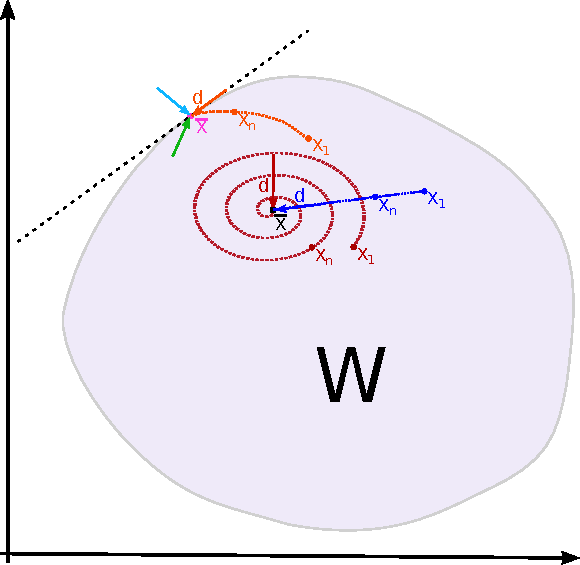

In [4]:
from wand.image import Image as WImage
img = WImage(filename='nn_images/stozekkierunkowstycznych.pdf', resolution=150) 
img

\begin{lemma}
\begin{enumerate}
\item $T(\overline{x})$ jest stożkiem, tzn. 
$$
\forall \lambda \geq 0\ \ \forall d\in \lambda\ d\in T(\overline{x})\ \ \lambda\,d\in T(\overline{x}) 
$$
\item Jeżeli $\overline{x}\in Int(W)$, to  $T(\overline{x})=\mathbb{R}^n$
\item Stożek $T(\overline{x})$ jest domknięty
\end{enumerate}
\end{lemma}

\begin{definition}
Niech $f:X\rightarrow \mathbb{R}$ będzie różniczkowalna w $\overline{x}\in X$. \textbf{Zbiorem kierunków spadku funkcji} $f$ \textbf{ w punkcie} $\overline{x}$ nazywamy zbiór
    \begin{equation}
    \label{opteq3}
    D(\overline{x})=\left\{d\in\mathbb{R}^n:\ Df(\overline{x})\cdot d <0\right\}
    \end{equation}
\end{definition}

Definicja ta jest oczywista, bo oznacza po prostu, że pochodna kierunkowa w kierunku $d$ jest w punkcie $\overline{x}$ ujemna ($Df(x)$ oznacza gradient funkcji $f$ w punkcie $x$). 

\begin{remark}
Jeżeli $d$ jest kierunkiem spadku w punkcie $x$, to istnieje $\delta > 0$, takie że dla $\alpha \in  (0, \delta)$ zachodzi $f(x + \alpha d) < f(x)$.
\end{remark}

Jest to dość naturalne przy założeniu różniczkowalności funcji: jeżeli w jakimś miejscu i w jakiś kierunku funkcja maleje, to maleje ona jeszcze w pewnym obszarze wzdłuż tego 
kierunku. 

\begin{theorem}Jeżeli $\overline{x}$ jest rozwiązaniem lokalnym problemu \textbf{(1)} oraz  $f:W\rightarrow \mathbb{R}$ jest różniczkowalna w $\overline{x}\in W$, to $D(\overline{x})\cap T(\overline{x})=\emptyset$.\end{theorem}

Powyższe twierdzenie mówi po prostu, że w punkcie osiągniecia minimum nie można już zmniejszać wartości funkcji bez opuszczenia zbioru $W$

## 1. Przybliżone rozwiązanie układu równań liniowych

Szukamy rozwiązania  układu 
$$
 \mathbf X \mathbf w = \mathbf y
$$

Jeżeli dokładne rozwiązanie nie istnieje i układ jest niesprzeczny można spróbować rozwiązać go w sposób przybliżony.

Założmy, że  $\mathbf w$ będzie najlepszym rozwiązaniem przybliżonym, tzn.  $$X \mathbf w \approx \mathbf y$$ oraz że błąd przybliżenia 
$$\mathbf e = \mathbf y - \mathbf X \mathbf w$$ jest możliwie mały. Ustalmy, że mierzymy go normą euklidesową, tzn. minimalizujemy operator $\mathbf  J(\mathbf w)$ taki, że 
$$J(\mathbf w) = \| \mathbf e \|^2 = \| \mathbf y - \mathbf X \mathbf w \|^2 = (\mathbf y-\mathbf X \mathbf w)^T(\mathbf y-\mathbf X \mathbf w) = \mathbf y^T \mathbf y - (\mathbf X \mathbf w)^T \mathbf y - \mathbf y^T (X \mathbf w) + (X \mathbf w)^T (X \mathbf w) = \mathbf y^T \mathbf y - 2 \mathbf w^T X^T \mathbf y + \mathbf w^T X^T X \mathbf w$$
Zatem warunek konieczny ekstremum oznacza, że
$$
\frac{\partial J(\mathbf w)}{\partial \mathbf w} = - 2 X^T \mathbf y + 2 X^T X \mathbf w = \mathbf 0
$$
Stąd 
$$X^T X \mathbf w = X^T \mathbf y,$$
a zatem 
$$\mathbf w = (X^T X)^{-1} X^T \mathbf y = X^+ \mathbf y$$
Macierz  $X^+ = (X^T X)^{-1} X^T$ jest dobrze znaną uogólnioną odwrotnością Moora-Penrosa. Jednak  równanie (11) może być zapisane jeżeli macierz $X^TX$ jest odwracalna. Czy zawsze tak jest? Po pierwsze zawsze macierz ta jest symetryczna. Po drugie jeżeli kolumny macierzy $X$ są liniowo niezależne, to macierz $X^TX$ jest odwracalna (pokazanie tego jest ćwiczeniem dla czytelnika). Odpowiedź ogólna wynika z poniższego twierdzenia

\begin{theorem}
Każdy układ liniowy $A\mathbf x = \mathbf b$, gdzie
$A$ jest macierzą wymiaru  $m × n$, ma jednoznaczne rozwiązanie  $\mathbf x^+$ będące  elementem minimalizującym normę kwadratową błędu $\|A\mathbf x- \mathbf b\|^2$. Ponadto $\mathbf x^+ = A^+\mathbf b = UD^+V^T \mathbf b$, gdzie $A=VDU^T$ jest rozkładem SVD macierzy $A$, natomiast $D^+$ posiada odwrócone (w sensie mnożenia) niezerowe elementy macierzy $D$.
\end{theorem}

Jeżeli $A$ jest macierzą rzędu $n$ (więc $m\geq n$), to rozwiązanie da się wyrazić w postaci rozkładu QR macierzy $A$ (czyli przez zastosowanie przekształceń Hausholdera)



## 2. Metody spadkowe

Rozpatrzmy najpierw przypadek \textbf{ optymalizacji bez ograniczeń}, tzn. w szczególności zakładamy, że w problemie optymalizacyjnym \textbf{(1)} zbiór $W=\mathbb{R}^n$. 
Ponadto chcemy zbudować algorytm jego rozwiązania w oparciu o kierunki spadku, tzn.  zakładamy dodatkowo, że funkcja $f : \mathbb{R}^n \rightarrow \mathbb{R}$ jest klasy $C^1$.
Kolejnym ułatwieniem w budowie algorytmu jest przyjęcie, że szukamy \textbf{rozwiązania lokalnego}, tzn. potencjalnie jednego w wielu minimów fukcji $f$.
Ogólny schemat takich metod jest następujący:
\begin{enumerate}
\item Startujemy z punktu poczatkowego $x_1$, o którym zakładamy, że znajduje sie blisko szukanego minimum lokalnego.
\item W kolejnych krokach generujemy punkty $x_2,\ x_3,\dots$ w ten sposób, aby $f(x_{k+1}) < f(x_k)$. 
\item Spodziewamy się, że w ten sposób dojdziemy do minimum $f$. Może sie jednak okazać, ze punkty skupienia ciagu $(x_k)$ nie będę rozwiązaniami
\end{enumerate}

\begin{definition}[Metoda spadkowa] Metodą spadkową nazywamy każdy algorytm w którym kolejny punkt $x_{k+1}$ zadany jest
wzorem
$$
x_{k+1} = x_k + \alpha_k\,d_k,
$$
gdzie $\alpha_k > 0$ oraz $d_k$ jest kierunkiem spadku, tzn.
$$
\begin{array}{ll}
Df(x_k)\cdot d_k < 0& \hbox{ jeżeli } Df(x_k) \not= 0,\\
d_k = 0, & \hbox{ jeżeli } Df(x_k) = 0.
\end{array}
$$
\end{definition}

Z Uwagi 1 (Remark 1) wynika, że dl dostatecznie małych $\alpha_k$ możemy przyjąć, że $f(x_{k+1})<f(x_k)$.

## 2.1 Metody największego spadku

Wiadomo, że kierunkiem najszybszego spadku wartości funkcji jest jej odwrócony gradient. W przypadku metod największeg spadku przyjmujemy więc, że rozpatrywanymi kierunkami spadku będą kierunki równoległe do gradientu. Schemat takich metod jest następujący:

\begin{enumerate}
\item \textbf{Inicjalizacja}: Wybierz punkt poczatkowy $x_1$.
\item \textbf{Krok k-ty}:
\begin{enumerate}
\item Wybierz $\alpha_k$.
\item Oblicz $x_{k+1} = x_k − \alpha_kDf(x_k)$
\end{enumerate}
\item \textbf{Koniec}: gdy $\|Df(x_{k+1})\|<\varepsilon$
\end{enumerate}

W istocie logika tej metody staje się oczywista, jeżeli spojrzymy na nią przez pryzmat równania drogi w zagadnieniach ruchu. Zmienna $x$ reprezentuje wówczas współrzędne drogi, indeks $k$ jest skwantowaną daną czasową, funkcja $f$ reprezentuje równanie położenia względem czasu, a gradient jest wówczas prędkością ruchu (styczna do równania wykresu równania drogi). Współczynnik $\alpha$ można interpretować jako skalę prędkości, przyjmując normalizację wektora gradientu. 

Bardziej szczegółowa klasyfikacja  metod największego spadku wynika z wyboru wartości $\alpha_k$ ($d_k$ oznacza odwrócony gradient$) 
\begin{enumerate}
\item \textbf{reguła dokładnej minimalizacji}: wybierz $\alpha_k$ takie, że
    $$
        f(x_k+\alpha_kd_k) = min_{\alpha\geq 0}f(x_k+\alpha d_k)
    $$
    Reguła dokładnej minimalizacji jest dobrze określona, jeżeli minimum po prawej stronie istnieje.
Ze względu na nieograniczoność przedziału, na którym poszukujemy minimum, reguła dokładnej
minimalizacji nie zawsze musi być dobrze określona
\item \textbf{reguła ograniczonej minimalizacji}: ustal $A>0$ oraz wybierz $\alpha_k$ takie, że
    $$
        f(x_k+\alpha_kd_k) = min_{\alpha \in[0, A]}f(x_k+\alpha d_k)
    $$
    Ograniczenie przedziału poszukiwań kroku $\alpha_k$ do $[0,A]$ gwarantuje istnienie  rozwiązania, gdyż minimalizujemy funkcję ciągłą na zbiorze zwartym. Po drugie, możemy zastosować szybsze metody poszukiwania.
minimum.
\item \textbf{reguła Armijo}: ustal $s>0$, $\beta,\sigma\in(0,1)$ oraz wybierz $\alpha_k=\beta^{m_k}s$, gdzie $m_k$ jest najmniejszą liczbą całkowitą $m$ spełniającą nierówność
    \begin{equation}
    \label{opteq4}
        f(x_k)- f(x_k+\beta^{m}s d_k) \geq -\sigma\beta^m s Df(x_k)\cdot d_k.
    \end{equation}
 Oznacza to, ze dla $m_k − 1$ zachodzi już nierówność przeciwna   
    $$
        f(x_k)- f(x_k+\beta^{m_k-1}s d_k) < -\sigma\beta^{m_k-1} s Df(x_k)\cdot d_k.
    $$
 Stała $s > 0$ nazywana jest krokiem, $\beta$ reguluje szybkość zmniejszania kroku (czym mniejsza
wartosc, tym szybciej krok sie zmniejsza), zas $\sigma$ odpowiedzialna jest za ostrość warunku:
mniejsza wartosc osłabia warunek. Dodatkowo, ponieważ dla metody najwiekszego spadku 
$dk = -Df(x_k)$, więc $Df(x_k)\cdot d_k=\|Df(x_k)\|^2$ i  nierówność (9) ma postać
\begin{equation}
\label{opteq5}
f(x_k)- f(x_k+\beta^{m}s d_k) \geq -\sigma\beta^m s \|Df(x_k)\|^2.
\end{equation}
\end{enumerate}

Poniższy rysunek ilustruje regułę Armijo. Startujemy z punktu $x_k-sDf(x_k)$ i sprawdzamy, czy spełniony jest warunek (11). Jeżeli nie, to rozważamy punkty $x_k-\beta sDf(x_k)$, $x_k-\beta^2 sDf(x_k)$, itd.  Dla kroków $\alpha = s$ i $\alpha = \beta s$ warunek (11)
nie jest spełniony. Krok $\alpha= \beta^2s$ jest pierwszym, dla którego (11) zachodzi, wiec $\alpha_k = \beta^2s$.

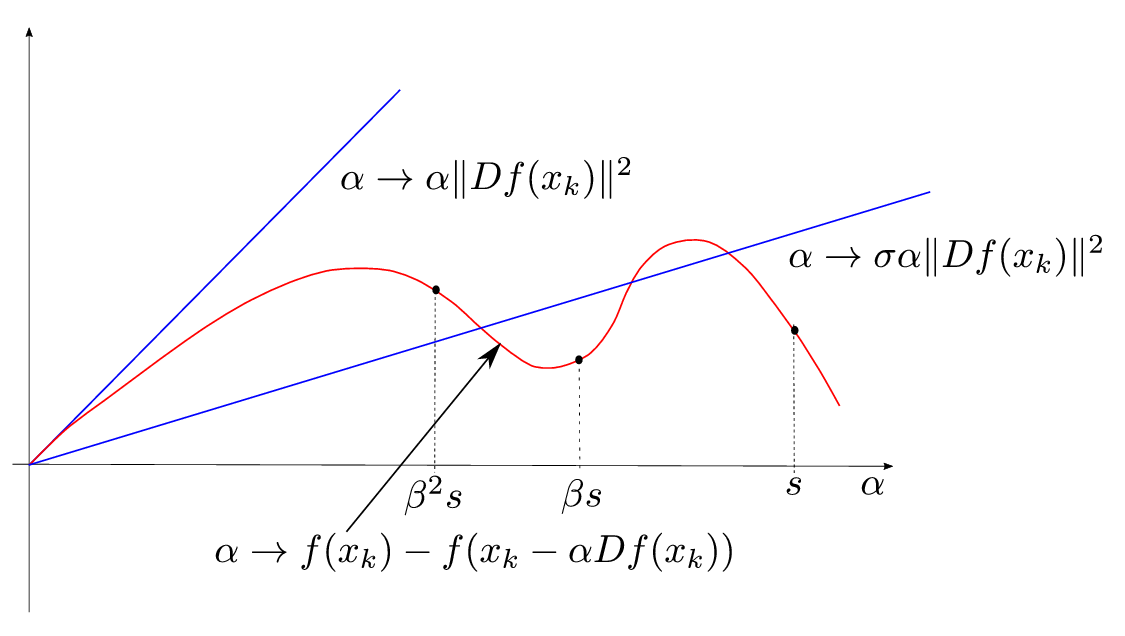

In [5]:
img = WImage(filename='nn_images/armijo.pdf', resolution=70) 
img

\begin{theorem}
Niech $(x_k)$ będzie ciągiem skonstruowanym przy pomocy metody największego
spadku z regułą dokładnej  minimalizacji, regułą minimalizacji ograniczonej lub reguła Armijo. Wówczas
każdy punkt skupienia $x$ tego ciągu jest punktem krytycznym, tzn. $Df(x)=0$.
\end{theorem}

Powyższe twierdzenie stanowi,że granica każdego zbieżnego podciągu ciągów z trzech rozpatrywanych metod największego spadku spełniają warunek konieczny dla bycia punktem osiągania ekstremum przez funkcję. Nie gwarantuje ono jednak, że caly ciąg jest zbieżny. Fakt ten można jednak uzyskać przy nieco wzmocnionych założeniach o funkcji $f$.

\begin{definition}[Zbiór poziomicowy] Niech $W\subset \mathbb{R}^n$. 
Zbiorem poziomicowym funkcji $f : W \rightarrow \mathbb{R}$ nazywamy zbiór
$$
W_\alpha(f) =\left\{x\in W:\ f(x)\leq \alpha\right\},\ \ \alpha\in\mathbb{R}
$$
\end{definition}

\begin{definition}[warunek Lipschitza] Niech $W\subset \mathbb{R}^n$. 
Funkcja $f : W \rightarrow \mathbb{R}$ spełnia na zbiorze $W$ warunek Lipschitza ze stałą $L>0$, jeżeli dla każdego $x,y\in W$ zachodzi:
$
|f(x)-f(y)|\leq L\|x-y\|
$
\end{definition}

\begin{theorem}
Niech funkcja $f$ będzie ograniczona z dołu,  a gradient funkcji $f$ będzie
    funkcją spełniajacą warunek Lipschitza ze stałą $L$ na zbiorze poziomicowym $S = W_{f(x_1)}(f)$.
Niech $(x_k)$ będzie ciągiem skonstruowanym przy pomocy metody największego spadku z regułą
Armijo, regułą dokładnej minimalizacji, która jest dobrze określona w każdym kroku (poprawność
reguły dokładnej  minimalizacji w każdym kroku gwarantuje w szczególnosci założenie zwartości
zbioru $S$) lub regułą minimalizacji ograniczonej, dla której $A > \frac{1}{2L}$. Wówczas albo istnieje $K$, takie że
$Df(x_K) = 0$, albo ciąg $(Df(x_k))$ zbiega do zera.
\end{theorem}

Powyższe twierdzenie dowodzi poprawności metod największego spadku, lecz nie mówi nic
o szybkości zbieżnosci i o warunku końca. Wzmacniając założenia można dowieść,
że zbieżność jest liniowa oraz warunek końca jest poprawny.

Niech $S = W_{f(x_1)}(f)$, $m(x)$ oznacza najmniejszą wartość własną hesjanu funkcji $f$, natomiast $M(x)$ – jego największą wartość własną.

\begin{theorem}
Załóżmy, że zbiór $S$ jest wypukły i zwarty, a funkcja $f$ jest klasy $C^2$ na $S$ oraz
$m = \inf_{x\in S} m(x) > 0$. Wówczas punkt $\overline{x}$ będący granicą ciągu $(x_k)$ wyznaczonego metodą największego
spadku należy do $S$ i  funkcja $f$ osiąga w nim minimum na $S$ oraz dla dowolnego $x\in S$ zachodzi
$$
\|x-\overline{x}\|\leq\frac{1}{m} \|Df(x)\|, \ \ \ \hbox{oraz}\ \ \  f(x)-f(\overline{x})\leq\frac{1}{m} \|Df(x)\|^2
$$
\end{theorem}

Powyższe twierdzenie pokazuje,że warunek końca sformułowany jako ograniczenie
na norme gradientu funkcji $f$ jest poprawny i daje ograniczenia zarówno na odległość przybliżenia
$x_{k}$ od punktu minimum, jak i na dokładność wyznaczenia wartosci minimalnej funkcji. Czym ”bardziej” ściśle wypukła jest funkcja na otoczeniu punktu $\overline{x}$, tj. czym większe jest 
$m$, tym ostrzejsza jest zależność między normą gradientu a odległością od punktu $\overline{x}$.

\begin{theorem}
Załóżmy, że zbiór $S$ jest wypukły i zwarty, a funkcja $f$ jest klasy $C^2$ na $S$ oraz
$m = \inf_{x\in S} m(x) > 0$. Niech $M = \sup_{x\in S} M(x)$. Wówczas $M<+\infty$ oraz dla ciągu $(x_k)$ wygenerowanego
przy pomocy metody największego spadku z regułą dokładnej minimalizacji mamy
$$
f(x_{k+1})-f(\overline{x})\leq \left(1-\frac{m}{2M}\right)(f(x_{k})-f(\overline{x}))
$$
natomiast ciągu $(x_k)$ wygenerowanego
przy pomocy metody największego spadku z regułą ograniczonej minimalizacji mamy
$$
f(x_{k+1})-f(\overline{x})\leq \left(1+m\gamma +\frac{mM\gamma^2}{2}\right)(f(x_{k})-f(\overline{x})),
$$
gdzie $$\gamma=min\left\{\frac{1}{M},A\right\}$$
\end{theorem}

Powyższe twierdzenie sugeruje, że zbieżność wartości funkcji jest najszybsza, jeżeli funkcja podobnie zachowuje się
we wszystkich kierunkach, czyli wartości własne macierzy drugich pochodnych leżą dość blisko
siebie. Wówczas iloraz $m/M$ jest największy, co korzystnie wpływa na współczynnik kontrakcji
$1 − m/(2M)$. A zatem algorytm największego spadku, podobnie jak wszystkie inne metody
spadkowe, bedzie najlepiej pracował na takich funkcjach, które mają stosunkowo duży iloraz
$m/M$, lub inaczej, $m$ jest tego samego rzędu co $M$. Twierdzenie 6 ma nieco inną tezę w przypadku reguły Armijo, ale zachowuje liniową zbieżność. Zaletą tej reguła ta jest to, że jest ona prosta
w implementacji i nie wymaga stosowania metod optymalizacji funkcji jednej zmiennej. Koszt
tego uproszczenia nie jest zwykle równiez duży, lecz zależy od parametrów $s, \sigma, \beta$. Nie ma niestety
reguł doboru tych parametrów – pozostawia się to doświadczeniu i intuicji użytkownika.

## 2.2 Minimalizacja kwadratowej funkcji kosztu w sieci neuronowej

Rozpatrzmy funkcję kosztu $J$, wyznaczającą wagi modelu nadzorowanego uczenia maszynowego  za pomocą sumy kwadratów błędów 
(ang. sum of squared errors — SSE) pomiędzy wyliczonym wynikiem modelu $\varphi(x)$, a rzeczywistą etykietą klas (ozn. $\mathbf z = \overline{\mathbf w}^T\overline{\mathbf x},\,\,\varphi(z)$ - funkcja aktywacji neuronu, $(x^{(i)})_1^m$ -  ciąg próbek, $(y^{(i)})_1^m$ - ciąg etykiet)
$$
J(\mathbf w)= \frac{1}{2}\sum_{i}(y^{(i)}-\varphi(z^{(i)}))^2
$$
Wartość $1/2$ ma na celu jedynie zniwelowanie stałej $2$ w wartości gradientu funkcji $J(\mathbf w)$:
$$
\frac{\partial J}{\partial \mathbf  w_j}= -\sum_{i}(y^{(i)}-\varphi(z^{(i)}))x_j^{(i)}
$$
Wówczas metoda największego spadku ze stałą szybkością uczenia ma postać (kompensacja dwóch minusów w drugim składniku):
$$
\mathbf w^{k+1}=\mathbf w^k+\eta \sum_{i}(y^{(i)}-\varphi(z^{(i)}))x_j^{(i)}
$$


# 3. Metoda mnożników Lagrange'a



Rozważmy problem optymalizacyjny z ograniczeniami nierównościowymi:

$$ 
\left\{ \begin{array}{l} f(x)\rightarrow min\\ 
g_i(x)\leq 0,\ \ i=1,2,\dots,m\\ 
x\in X\subset \mathbb{R}^n,
\end{array}
\right. 
$$

gdzie $X$ jest zbiorem otwartym, $f,g_i:X\rightarrow \mathbb{R}$

Zatem wprowadzony powyżej zbiór $W$ ma postać 
$$
W=\{x\in X:\ g_i\leq 0,\ i=1,2,\dots,m\}.
$$

\begin{definition}
\textbf{Zbiorem ograniczeń aktywnych} w punkcie $\overline{x}\in W$. nazywamy zbiór

 \begin{equation}
    I(\overline{x})=\left\{i\in\{1,2,\dots,m\}:\ g_i(\overline{x})=0\right\}
    \end{equation}
\end{definition}

\begin{example}
Rozważmy następujący problem optymalizacyjny 

$$ 
\left\{ \begin{array}{l} f(x)\rightarrow min\\ 
g_1(x)=x-4\leq 0\\ 
g_2(x)=-x-10\leq 0
\end{array}
\right. 
$$

Ograniczenia oznaczają, że $x\in[-10,4]$. Rozwiązanie tego problemu, to oczywiście $\overline{x}=0$. Rozwiązanie to jest niezależne od wprowadzonych ograniczeń, tzn. gdyby ich nie było, to byłoby takie samo. Mówimy wtedy, że pewne (lub wszsystkie) \textit{ograniczenia są nieaktywne}.

Zmieńmy teraz te ograniczenia:

$$ 
\left\{ \begin{array}{l}
g_1(x)=-x+1\leq 0,\\ 
g_2(x)=x-4\leq 0
\end{array}
\right. 
$$

Takie ograniczenia oznaczają, że $x\in[1,4]$. Rozwiązanie  problemu jest teraz $\overline{x}=1$. Wynika stąd, że ograniczenie $g_2(x)\leq 0$ jest nieaktywne, ale ograniczenie $g_1(x)\leq 0$ jest \textit{aktywne}. W tym przypadku zachodzi 

$$
g_1(\overline{x}) = -\overline{x}+1 = 0.
$$

Zatem aktywne ograniczenie oznacza, że w punkcie rozwiązania problemu funkcja tego ograniczenia przyjmuje wartość 0.
\end{example}


\begin{definition}
Niech $g_i:X\rightarrow \mathbb{R}$ będą różniczkowalne w $\overline{x}\in W$ dla każdego $i\in I(\overline{x})$. \textbf{Stożkiem kierunków stycznych w punkcie} $\overline{x}$ \textbf{dla ograniczeń zlinearyzowanych} 
     nazywamy zbiór
     
  \begin{equation}
    T_{lin}(\overline{x})=\left\{d\in\mathbb{R}^n:\ Dg_i(\overline{x})\cdot d \leq 0\right\}
   \end{equation}
\end{definition}


\begin{lemma}
Jeżeli $\overline{x}\in W$, to $T(\overline{x})\subset T_{lin}(\overline{x})$
\end{lemma}

\begin{example}
Rozważmy następujący  zbiór

$$
W=\left\{ x\in\mathbb{R}^2:\ x_1^2+x_2^2\leq 1,\ x_2\geq 0\right\}
$$

będący domkniętym półkołem na płaszczyźnie o środku $(0,0)$ i promieniu 1. Zbiór ten można wyrazić w postaci ograniczeń nierównościowych pewnego zagadnienia optymalizacyjnego, definiując funkcje:

$$ 
\begin{array}{l} 
g_1(x_1,x_2)=x_1^2+x_2^2-1\\ 
g_2(x_1,x_2)=-x_2
\end{array}
$$

Nietrudno sprawdzić, że
\begin{itemize}
\item jeżeli $\overline{x}=(0.5,0.5)$, to $\overline{x}\in Int(W)$ oraz $T_{lin}(\overline{x})=(\overline{x})$ 
\item jeżeli $\overline{x}=(0,1)$, to $\overline{x}\in \partial(W)$ oraz $T_{lin}(\overline{x})=(\overline{x})$
\item jeżeli $\overline{x}=(1,0)$, to $\overline{x}\in \partial(W)$ oraz $T_{lin}(\overline{x})=(\overline{x})$
\end{itemize}

Zmieńmy teraz drugie ograniczenie:

$$ 
g_2(x)=-x_2^2
$$

Nie powoduje to zmiany kształtu zbioru $W$, ale tym razem

\begin{itemize}
\item jeżeli $\overline{x}=(0,1)$, to $\overline{x}\in \partial(W)$ oraz $T_{lin}(\overline{x})=(\overline{x})$
\item jeżeli $\overline{x}=(1,0)$, to $\overline{x}\in \partial(W)$ oraz $T_{lin}(\overline{x})\not \subsetneqq(\overline{x})$
\end{itemize}

\end{example}

\begin{theorem}[Kuhna-Tuckera]
Niech $\overline{x}$ będzie rozwiązaniem lokalnym problemu optymalizacyjnego  z ogrniczeniami nierównościowymi (27). Niech funkcja $f$ oraz funkcje $g_i$  dla $i\in I(\overline{x})$ będą różniczkowalne. Ponadto niech $T_{lin}(\overline{x})=T(\overline{x})$. Wtedy istnieje wektor $\mu\in[0,\infty)^m$ taki, że

$$ 
\left\{
\begin{array}{l}
Df(\overline{x})+ \sum\limits_{i\in I(\overline{x})}\mu_iDg_i(\overline{x})=0^T\\ 
\mu_ig_i(x)= 0,\ \ \hbox{dla }\ i=1,2,\dots,m
\end{array}
\right.
$$

\end{theorem}

Wektor $\mu$ nazywamy  \textbf{wektorem mnożników Lagrange'a w punkcie }$\overline{x}$. 

Z drugiego warunku tezy wynika, że jeżeli $g_i(x)<0$, to $\mu_i=0$. Stąd czasami pierwszy warunek tezy zapisuje się nieformalnie jako:

$$ 
Df(\overline{x})+ \sum\limits_{i=1}^m\mu_iDg_i(\overline{x})=0^T,
$$
co daje układ równań $n$ równań
$$ 
\frac{\partial f}{\partial x_j}(\overline{x})+ \sum\limits_{i=1}^m \mu_i \frac{\partial g_i}{\partial x_j}(\overline{x})=0,\ \ \ j=1,2,\dots,n.
$$
\end{theorem}


\textbf{Uwaga:} Jeżeli $\overline{x}\in Int(W)$ (tzn. $I(\overline{x})=\emptyset$), to warunki Kuhna-Tuckera mają postać
$$ 
\left\{
\begin{array}{l}
Df(\overline{x})=0^T\\ 
\mu = 0^T
\end{array}
\right.
$$

<b>Uwaga:</b> Pierwszy warunek Kuhna-Tuckera wyraźnie oznacza warunek konieczny dla istnienia ekstremum funkcji 
$$
f(x) + \sum\limits_{i\in I(x)}\mu_i g_i(x), 
$$
co sugeruje, że formuła optymalizacji z ograniczeniami została tu zastąpiona formułą optymalizacji (niemal, bo warunek drugi) bez ograniczeń nieco innej funkcji.